In [ ]:
#Montagem do drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#Importando o dataset do drive
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
dataset = pd.read_csv("/content/drive/My Drive/app/Admission_Predict_Ver1.1.csv")

In [ ]:
# ALUNOS
# Jesus Dourado de Albuquerque
# Danilo Souza Frazão
# SOBRE O DATASET
# ----------------
# This dataset is inspired by the UCLA Graduate Dataset
# The dataset is owned by Mohan S Acharya.
# A Comparison of Regression Models for Prediction of Graduate Admissions
# IEEE International Conference on Computational Intelligence in Data Science 2019
# Please cite the following if you are interested in using the dataset : 
#      Mohan S Acharya
#      Asfia Armaan, 
#      Aneeta S Antony

In [ ]:
# Preparacao das variáveis do dataset
X = dataset.loc[:,'GRE Score':'Research']
Y = dataset.loc[:,'Chance of Admit ']
#print Y

In [ ]:
# Dividindo o dataset
from sklearn import model_selection
semente = 17
array = dataset.values
tam = 0.90
X = array[:,1:8]
Y = array[:,8]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=tam, random_state=semente)

print X_train
print len(X_train)
print Y_train

[[329.   113.     4.     4.     3.5    9.36   1.  ]
 [309.   100.     2.     3.     3.     8.1    0.  ]
 [327.   111.     4.     3.     4.     8.4    1.  ]
 [323.   110.     3.     4.     3.5    9.1    1.  ]
 [324.   107.     5.     3.5    4.     8.66   1.  ]
 [330.   113.     5.     5.     4.     9.31   1.  ]
 [321.   111.     3.     2.5    3.     8.9    1.  ]
 [316.   102.     3.     2.     3.     7.4    0.  ]
 [332.   118.     2.     4.5    3.5    9.36   1.  ]
 [290.   100.     1.     1.5    2.     7.56   0.  ]
 [318.   110.     1.     2.5    3.5    8.54   1.  ]
 [326.   113.     5.     4.5    4.     9.4    1.  ]
 [316.   104.     3.     3.     3.5    8.     1.  ]
 [308.   105.     4.     3.     2.5    7.95   1.  ]
 [320.   108.     3.     3.5    4.     8.44   1.  ]
 [300.    99.     1.     1.     2.5    8.01   0.  ]
 [338.   118.     4.     3.     4.5    9.4    1.  ]
 [316.   111.     4.     4.     5.     8.54   0.  ]
 [324.   111.     4.     3.     3.     9.01   1.  ]
 [329.   114

In [ ]:
# Prepare os registros de teste
X_test = [
          [327,113,4,4.5,4.5,9.04,0],
          [312,103,4,4,5,8.43,0],
          [330,120,5,4.5,5,9.56,1],
          [337,117,5,5,5,9.87,1],
          [332,108,5,4.5,4,9.02,1],
          [301,99,3,2.5,2,8.45,1],
          [300,95,2,3,1.5,8.22,1],
          [298,101,4,2.5,4.5,7.69,1],
          [297,99,4,3,3.5,7.81,0],
          [307,105,2,2.5,4.5,8.12,1]
         ]
chance = [0.84, 0.73, 0.93, 0.96, 0.87, 0.68, 0.62, 0.53, 0.54, 0.67]

In [ ]:
# Convertendo a classe de predição de float para string
y = np.array(Y)
y_string = ["%.2f" % x for x in y]

In [ ]:
# Utilizando o KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X, y_string)

predicao_knn = knn.predict(X_train)
print "Resultado da predicao utilizando KNN:"
print predicao_knn

Resultado da predicao utilizando KNN:
['0.89' '0.48' '0.78' '0.78' '0.81' '0.86' '0.80' '0.52' '0.90' '0.37'
 '0.67' '0.91' '0.72' '0.58' '0.71' '0.51' '0.91' '0.75' '0.79' '0.86'
 '0.52' '0.44' '0.78' '0.70' '0.46' '0.56' '0.58' '0.80' '0.68' '0.42'
 '0.72' '0.39' '0.74' '0.71' '0.94' '0.47' '0.64' '0.81' '0.48' '0.65'
 '0.52' '0.58' '0.90' '0.47' '0.52' '0.61' '0.64' '0.97' '0.52' '0.69']


In [ ]:
# Utilizando o NaiveBayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# gerar modelo de aprendizgem
nb.fit(X, y_string)

# Predizendo os testes
predicao_nb = nb.predict(X_train)
print "Resultado da predicao utilizando NaiveBayes:"
print(predicao_nb)

Resultado da predicao utilizando NaiveBayes:
['0.90' '0.48' '0.78' '0.84' '0.78' '0.93' '0.80' '0.45' '0.90' '0.47'
 '0.72' '0.92' '0.73' '0.62' '0.74' '0.47' '0.91' '0.77' '0.84' '0.92'
 '0.49' '0.44' '0.90' '0.86' '0.63' '0.63' '0.71' '0.83' '0.77' '0.63'
 '0.60' '0.65' '0.74' '0.63' '0.96' '0.48' '0.63' '0.85' '0.48' '0.63'
 '0.74' '0.48' '0.95' '0.60' '0.63' '0.61' '0.63' '0.97' '0.60' '0.85']


In [ ]:
#Utilizando Regressão Linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Gerando modelo de aprendizagem
model.fit(X, Y)

#Predizendo os testes
predicao_rl = model.predict(X_train)
print "Resultado da predicao utilizando Regressão: "
print (predicao_rl)

Resultado da predicao utilizando Regressão: 
[0.87114163 0.60248697 0.75506225 0.81493519 0.7758894  0.88303776
 0.77951056 0.54253815 0.87951734 0.4780681  0.72508509 0.88546532
 0.65344812 0.62452141 0.73330589 0.55478477 0.92176606 0.74532999
 0.80484288 0.88581669 0.58453558 0.60173397 0.85548016 0.83087451
 0.66271385 0.56079874 0.68011565 0.77888419 0.71662206 0.65337161
 0.67427473 0.65630992 0.65773635 0.66020593 0.9806773  0.59658817
 0.72329884 0.82011996 0.58365522 0.64949046 0.71664474 0.66356192
 0.88601188 0.5246482  0.58725025 0.65327151 0.62389384 0.98654908
 0.61395638 0.77308922]


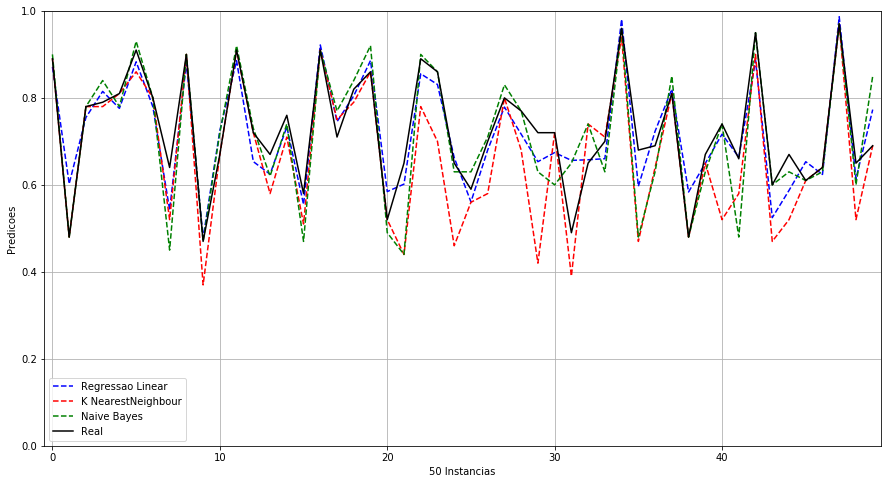

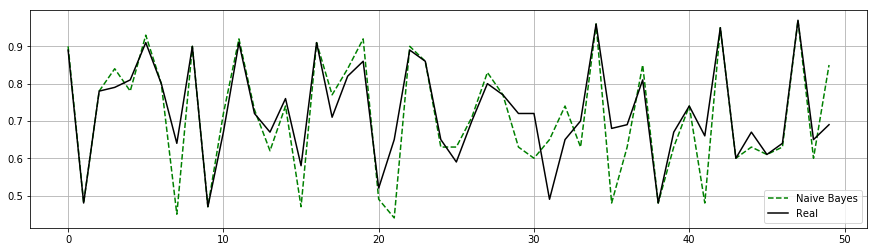

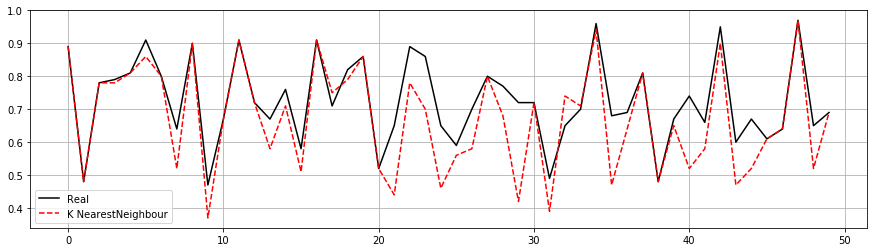

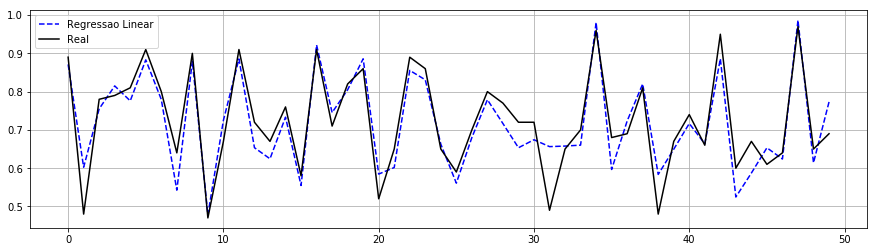

In [ ]:
# Plotando o gráfico dos 3 modelos
import matplotlib.pyplot as plt
import numpy as np

# Tratando alguns dados
predicao_knn = predicao_knn.astype(np.float)
predicao_nb = predicao_nb.astype(np.float)

# Tamanho do gráfico
plt.figure(figsize=(15,8))

# Definindo o eixo x
x = np.array(range(len(predicao_rl)))

# Plotando os modelos preditidos
plt.plot(x, predicao_rl, 'k--', label="Regressao Linear", color='blue')
plt.plot(x, predicao_knn, 'k--', label="K NearestNeighbour", color='red')
plt.plot(x, predicao_nb, 'k--', label="Naive Bayes", color='green')
plt.plot(x, Y_train, 'k-', label="Real", color='black')  # linha tracejada azulp

# Configurando o gráfico
plt.axis([-0.5, len(predicao_rl) - 0.5, 0, 1])
plt.legend()
plt.grid(True)
plt.xlabel(str(len(predicao_knn)) + " Instancias")
plt.ylabel("Predicoes")

plt.show()

plt.figure(figsize=(15,4))
plt.plot(x, predicao_nb, 'k--', label="Naive Bayes", color='green')
plt.plot(x, Y_train, 'k-', label="Real", color='black')  # linha tracejada azul
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x, Y_train, 'k-', label="Real", color='black')  # linha tracejada azulp
plt.plot(x, predicao_knn, 'k--', label="K NearestNeighbour", color='red')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,4))
plt.plot(x, predicao_rl, 'k--', label="Regressao Linear", color='blue')
plt.plot(x, Y_train, 'k-', label="Real", color='black')  # linha tracejada azul
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculando a precisão das predições em relação aos valores reais

# Total de predições dos valores reais
soma_chance = 0
soma_knn = 0
soma_nb = 0
soma_rl = 0
ix = 0
for i in Y_train:
  # Para Predição Linear
  if(i > predicao_rl[ix]):
    soma_rl = soma_rl + predicao_rl[ix] / i
  else:
    soma_rl = soma_rl + i / predicao_rl[ix]

  # Para K Nearest Neighbour
  if(i > predicao_knn[ix]):
    soma_knn = soma_knn + predicao_knn[ix] / i
  else:
    soma_knn = soma_knn + i / predicao_knn[ix]

  if(i > predicao_nb[ix]):
    soma_nb = soma_nb + predicao_nb[ix] / i
  else:
    soma_nb = soma_nb + i / predicao_nb[ix]

  ix = ix + 1

soma_rl = soma_rl * 100 / len(predicao_rl)
soma_knn = soma_knn * 100 / len(predicao_knn)
soma_nb = soma_nb * 100 / len(predicao_nb)

# Resultado das acurácias

print ("Acuracia de Regressao Linear:      %.2f" % soma_rl + "%")
print ("Acuracia de Naive Bayes:           %.2f" % soma_nb + "%")
print ("Acuracia de K Nearest Neighbour:   %.2f" % soma_knn + "%")

Acuracia de Regressao Linear:      94.02%
Acuracia de Naive Bayes:           93.25%
Acuracia de K Nearest Neighbour:   91.11%


In [ ]:
# Recebendo informações do usuário

usuario = []

# GRE Score
gre = float(input('Nota geral do Enem: '))
gre = (gre * 0.08) + 260
usuario.append(gre)

# TOEFL Score
toefl = float(input('Nota de ingles do Enem: '))
toefl *= 0.12
usuario.append(toefl)

# University Rating
uniRat = float(input('Nota da faculdade no ENADE: '))
usuario.append(uniRat)

# SOP
sop = float(input('Nota de redacao do Enem: '))
sop *= 0.005
usuario.append(sop)

# LOR
lor = float(input('Nota da Carta de Recomendacao: '))
lor *= 0.005
usuario.append(lor)

# CGPA
cgpa = float(input('Coeficiente no Ensino Medio: '))
usuario.append(cgpa)

# Research
reser = float(input('Tem experiencia em pesquisa? '))
usuario.append(reser)

# Preparando o caso de teste
teste_usuario = []
teste_usuario.append(usuario)

# Predicao utilizando Regressao Linear
predicao_usuario = model.predict(teste_usuario)
print ("Chance de Admissao: %.2f" % (predicao_usuario * 100) + "%")

Nota geral do Enem: 750
Nota de ingles do Enem: 800
Nota da faculdade no ENADE: 4
Nota de redacao do Enem: 740
Nota da Carta de Recomendacao: 8
Coeficiente no Ensino Medio: 7.5
Tem experiencia em pesquisa? 0
Chance de Admissao: 50.39%
